In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.graph_objs import Bar, Layout
from collections import Counter

In [2]:
data = pd.read_csv('D:\\AgReliant\\CropData\\InputData\\data.csv')

In [3]:
data.head()

,Year,Temp,Precipitation,PlantedAcreage,Harvested,Production,Yieldperharvested,Cashprices,Inflation
0,1976,51.50,2.61,78.72,67.63,"5,840.76",86.4,2.61,24.685420
1,1977,51.47,1.76,84.59,71.51,"6,289.17",88.0,2.22,26.101629
2,1978,52.55,1.58,84.33,71.61,"6,505.04",90.8,2.06,27.794701
3,1979,51.05,3.18,81.68,71.93,"7,267.93",101.0,2.30,29.920290
4,1980,50.88,3.31,81.39,72.40,"7,928.14",109.5,2.55,33.291123


In [8]:
data.describe()

,Year,Temp,Precipitation,PlantedAcreage,Harvested,Yieldperharvested,Cashprices,Inflation
count,42.000000,42.000000,42.000000,42.000000,42.000000,41.000000,41.000000,42.000000
mean,1996.500000,52.793333,2.237857,81.006667,72.815476,125.864390,2.949268,69.992564
std,12.267844,1.040489,0.612976,7.719398,7.755928,24.604247,1.269879,25.822221
min,1976.000000,50.880000,0.980000,60.210000,51.480000,81.100000,1.510000,24.685420
25%,1986.250000,52.035000,1.835000,77.625000,69.015000,108.900000,2.220000,49.574535
50%,1996.500000,52.760000,2.155000,80.345000,72.420000,126.700000,2.520000,70.907024
75%,2006.750000,53.327500,2.687500,84.525000,75.187500,146.800000,3.330000,91.727412
max,2017.000000,55.280000,3.360000,97.290000,87.450000,171.000000,7.030000,110.067009


In [9]:
#tab1 = data[['Year', 'Temp', 'Precipitation','Planted acreage (Million acres)','Harvested for grain (Million acres)','Production (Million bushels)']]

tab1 = [go.Scatter(
          x=data.Year,
          y=data['Precipitation'])]

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(tab1)                      
             

In [10]:
tab2 = [go.Scatter(
          x=data.Year,
          y=data['Temp'])]
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(tab2)   

In [11]:
trace_high = go.Scatter(
                x=data.Year,
                y=data['Temp'],
                name = " Average Temperature Units: Degrees Fahrenheit",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=data.Year,
                y=data['Yieldperharvested'],
                name = "Yield per harvested acre (Bushels per acre)",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data3 = [trace_high,trace_low]

layout = dict(
    title = "Historical corn yeild vs Average Temp",
    xaxis = dict(
        range = ['1976-07-01','2017-12-31'])
)

fig = dict(data=data3, layout=layout)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename = "Historical corn yeild vs Average Temp ") 
#py.iplot(fig, filename = "Manually Set Range")

In [146]:
trace_high = go.Scatter(
    x=data.Year,
    y=data['Planted acreage (Million acres)'],
    name = "Planted acreage (Million acres)",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=data.Year,
    y=data['Harvested for grain (Million acres)'],
    name = "Harvested for grain (Million acres)",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data4 = [trace_high,trace_low]

layout = dict(
    title='Historical corn Planted Acres and Harvested Acres',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1y',
                     step='year',
                     stepmode='backward'),
                dict(count=6,
                     label='6y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data4, layout=layout)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename = "Historical corn Planted Acres and Harvested Acres ") 
#py.iplot(fig, filename = "Time Series with Rangeslider")

In [12]:
trace_high = go.Scatter(
    x=data.Year,
    y=data['Inflation'],
    name = "Inflation",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=data.Year,
    y=data['Cashprices'],
    name = "Cash prices at principal markets (dollars per bushel)",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data5 = [trace_high,trace_low]

layout = dict(
    title='Inflation effect on the Cash prices at principal markets (dollars per bushel)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1y',
                     step='year',
                     stepmode='backward'),
                dict(count=6,
                     label='6y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data5, layout=layout)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename = "Inflation effect on the Cash prices at principal markets (dollars per bushel) ") 
#py.iplot(fig, filename = "Time Series with Rangeslider")

In [15]:
# scatter plot matrix
import plotly.plotly as py
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(data, diag='histogram',
                                  height=800, width=800)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename = "Corelation Matrix ") 


In [102]:
import seaborn as sns
sns.set(style="ticks", palette="colorblind")
cm = data.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

cm.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '200px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Year,Temp,Precipitation,PlantedAcreage,Harvested,Yieldperharvested,Cashprices,Inflation
Year,1,0.63,-0.095,0.52,0.63,0.89,0.53,1
Temp,0.63,1,-0.14,0.26,0.34,0.48,0.25,0.62
Precipitation,-0.095,-0.14,1,-0.2,-0.17,-0.14,-0.035,-0.096
PlantedAcreage,0.52,0.26,-0.2,1,0.98,0.5,0.57,0.5
Harvested,0.63,0.34,-0.17,0.98,1,0.65,0.58,0.62
Yieldperharvested,0.89,0.48,-0.14,0.5,0.65,1,0.29,0.88
Cashprices,0.53,0.25,-0.035,0.57,0.58,0.29,1,0.54
Inflation,1,0.62,-0.096,0.5,0.62,0.88,0.54,1


In [55]:
data.head()

,Year,Temp,Precipitation,PlantedAcreage,Harvested,Production,Yieldperharvested,Cashprices,Inflation
0,1976,51.50,2.61,78.72,67.63,"5,840.76",86.4,2.61,24.685420
1,1977,51.47,1.76,84.59,71.51,"6,289.17",88.0,2.22,26.101629
2,1978,52.55,1.58,84.33,71.61,"6,505.04",90.8,2.06,27.794701
3,1979,51.05,3.18,81.68,71.93,"7,267.93",101.0,2.30,29.920290
4,1980,50.88,3.31,81.39,72.40,"7,928.14",109.5,2.55,33.291123


In [56]:
from sklearn import linear_model

df = data.copy()
#x = df[['Year', 'Temp','Precipitation', 'Planted acreage (Million acres)', 'Harvested for grain (Million acres)', 'Production (Million bushels)','Production (Million bushels)']]
#y = df[['Yield per harvested acre (Bushels per acre)']]
train = df[['Year', 'Temp','Precipitation', 'PlantedAcreage', 'Harvested', 'Production','Yieldperharvested']]


In [57]:
train.head()

,Year,Temp,Precipitation,PlantedAcreage,Harvested,Production,Yieldperharvested
0,1976,51.50,2.61,78.72,67.63,"5,840.76",86.4
1,1977,51.47,1.76,84.59,71.51,"6,289.17",88.0
2,1978,52.55,1.58,84.33,71.61,"6,505.04",90.8
3,1979,51.05,3.18,81.68,71.93,"7,267.93",101.0
4,1980,50.88,3.31,81.39,72.40,"7,928.14",109.5


In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='Yieldperharvested ~ Year + Temp + Precipitation + PlantedAcreage + Harvested', data=train)
results_formula = model.fit()
results_formula.params

Intercept        -2001.681576
Year                 1.100489
Temp                -1.615487
Precipitation       -3.661097
PlantedAcreage      -5.345660
Harvested            6.287263
dtype: float64

In [59]:
#Prediction using Multiple Linear Regression Model the yeild for 2017 year

X_new= [[2017,54.91,2.04,94.15,86.55]]
df2_new= pd.DataFrame(X_new,columns=['Year', 'Temp','Precipitation', 'PlantedAcreage', 'Harvested'])
results_formula.predict(df2_new)

0    162.699145
dtype: float64

In [60]:
### I have a dataset containing data on temperature, precipitation and corn yields for a farm for years (1976 - 2016).
#I would like to predict yields for 2017 based on this data.

#Please note that the dataset has DAILY values for temperature and precipitation,
#but only 1 value per year for the yield, since harvesting of crop happens at end of growing season of crop.

#The tricky part here is that temperature and precipitation are daily but yield is just 1 value per year.


In [124]:
from pandas import Series
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

series = Series.from_csv('D:\\AgReliant\\CropData\\InputData\\CHRIS-CME_C1.csv', header=0)
CF = pd.read_csv('D:\\AgReliant\\CropData\\InputData\\CHRIS-CME_C1.csv')

In [125]:
CF.dtypes

Date                           object
Open                          float64
High                          float64
Low                           float64
Last                          float64
Change                        float64
Settle                        float64
Volume                          int64
Previous Day Open Interest      int64
dtype: object

In [105]:
CF.head()
from datetime import datetime

CF['DateNEW'] = pd.to_datetime(CF['Date']).dt.strftime('%Y-%m-%d')

In [106]:
CF_df = CF[["DateNEW","Open"]]
CF_df.head()

,DateNEW,Open
0,1959-07-01,120.2
1,1959-07-02,119.6
2,1959-07-06,119.4
3,1959-07-07,118.1
4,1959-07-08,118.4


In [107]:
series.head()
#series.dropna()

Date
1959-07-01    120.2
1959-07-02    119.6
1959-07-06    119.4
1959-07-07    118.1
1959-07-08    118.4
Name: Open, dtype: float64

In [108]:
series.index

DatetimeIndex(['1959-07-01', '1959-07-02', '1959-07-06', '1959-07-07',
               '1959-07-08', '1959-07-09', '1959-07-10', '1959-07-13',
               '1959-07-14', '1959-07-15',
               ...
               '2017-08-29', '2017-08-30', '2017-08-31', '2017-09-01',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-11', '2017-09-12'],
              dtype='datetime64[ns]', name='Date', length=14656, freq=None)

In [109]:
series.describe()

count    14655.000000
mean       264.810901
std        134.013714
min        100.400000
25%        168.000000
50%        243.000000
75%        318.375000
max        830.250000
Name: Open, dtype: float64

In [110]:
series['2017-09-08']

342.25

In [111]:
from datetime import datetime
series[datetime(2017,9,8)]

342.25

In [112]:
series['2016'].head()

Date
2016-01-04    359.50
2016-01-05    352.75
2016-01-06    353.50
2016-01-07    353.25
2016-01-08    353.00
Name: Open, dtype: float64

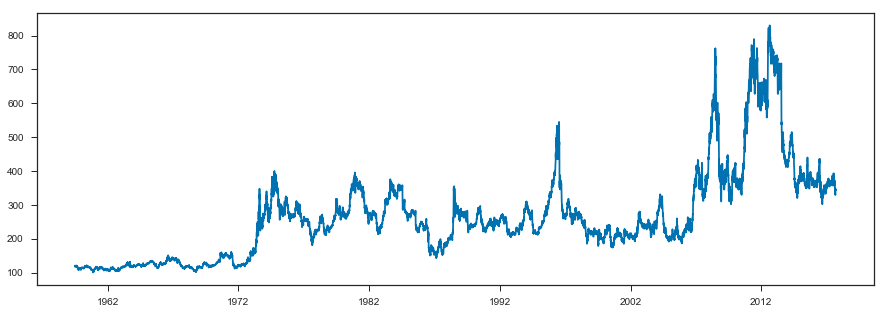

In [130]:
# Stationarity of a Time Series
rcParams['figure.figsize'] = 15,5
plt.plot(series)

In [114]:
#It is clearly evident that there is an overall increasing trend in 
#the data along with some seasonal variations.

In [84]:
# check stationarity using  Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



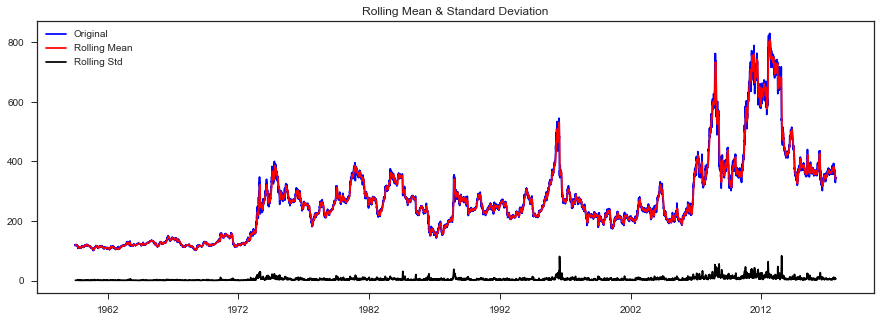

In [131]:
rolmean = pd.rolling_mean(series, window=12)
rolstd = pd.rolling_std(series, window=12)

orig = plt.plot(series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
rcParams['figure.figsize'] = 15,5
plt.show(block=False)

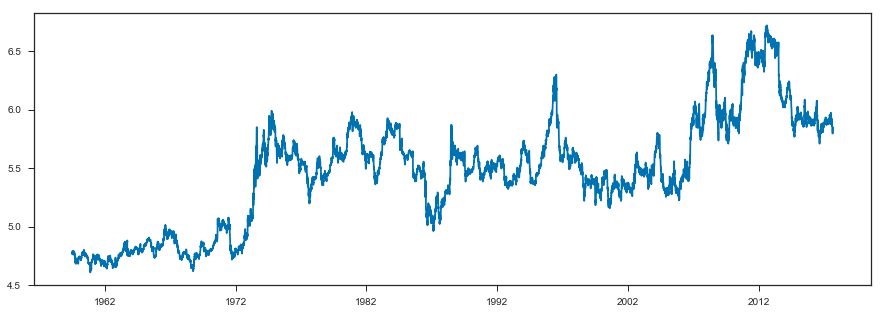

In [132]:
ts_log = np.log(series)
plt.plot(ts_log)

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()



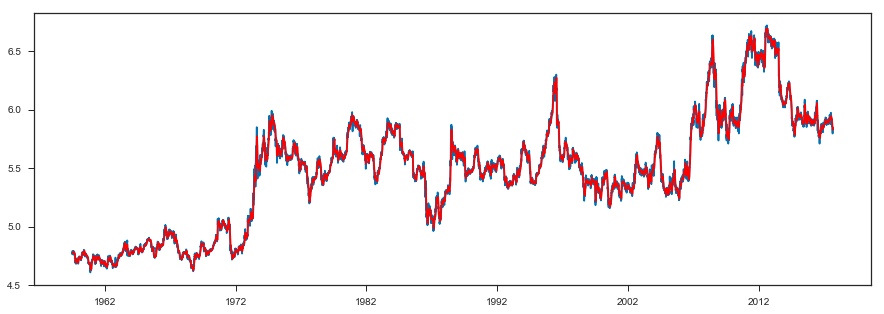

In [133]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [134]:
ts_log_moving_avg_diff = ts_log - moving_avg

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:7: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:8: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



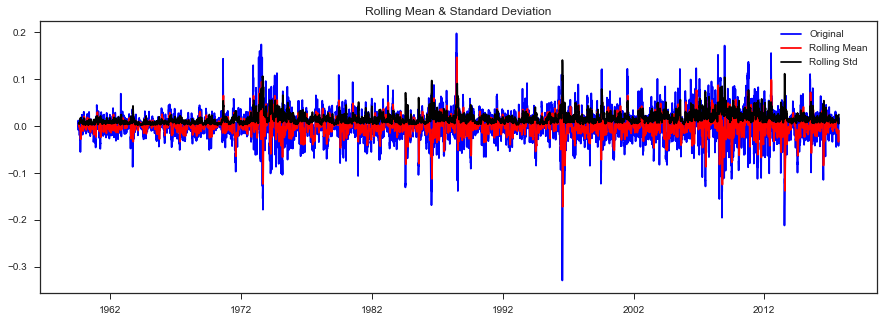

Results of Dickey-Fuller Test:
Test Statistic                   -23.542544
p-value                            0.000000
#Lags Used                        19.000000
Number of Observations Used    14613.000000
Critical Value (1%)               -3.430798
Critical Value (10%)              -2.566875
Critical Value (5%)               -2.861738
dtype: float64


In [135]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [90]:
# Also, the test statistic is smaller than the 5% critical values so we can say with 95% 
#confidence that this is a stationary series

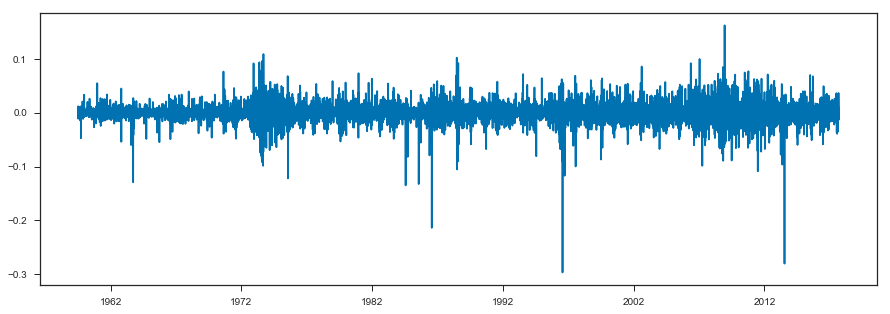

In [136]:
#Trend and Seasonality
sns.set(style="ticks", palette="colorblind")
ts_log_diff = ts_log - ts_log.shift()
rcParams['figure.figsize'] = 15,5
plt.plot(ts_log_diff)

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:7: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

D:\Installation\Anaconda3-4-1-1\lib\site-packages\ipykernel\__main__.py:8: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



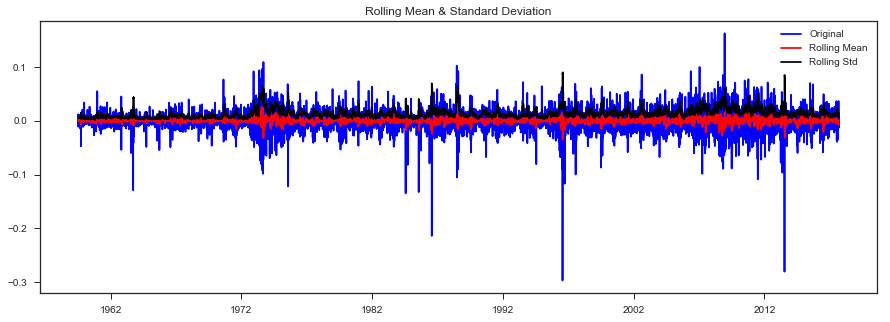

Results of Dickey-Fuller Test:
Test Statistic                   -26.703950
p-value                            0.000000
#Lags Used                        18.000000
Number of Observations Used    14634.000000
Critical Value (1%)               -3.430797
Critical Value (10%)              -2.566875
Critical Value (5%)               -2.861738
dtype: float64


In [138]:
ts_log_diff.dropna(inplace=True)
rcParams['figure.figsize'] = 15,5
test_stationarity(ts_log_diff)

In [139]:
#Forecasting
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')


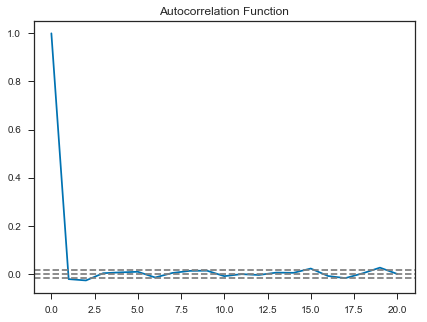

In [142]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

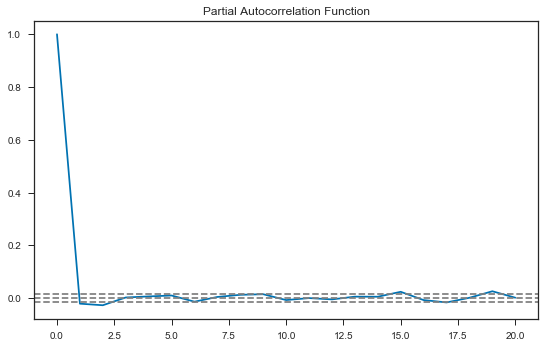

In [143]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

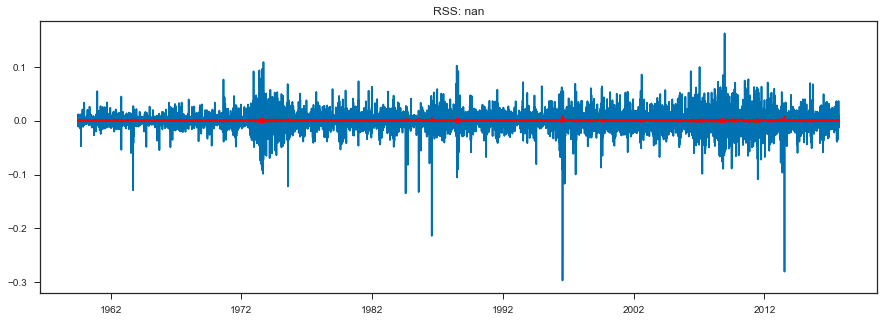

In [144]:
from statsmodels.tsa.arima_model import ARIMA
ts_log.dropna(inplace=True)
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

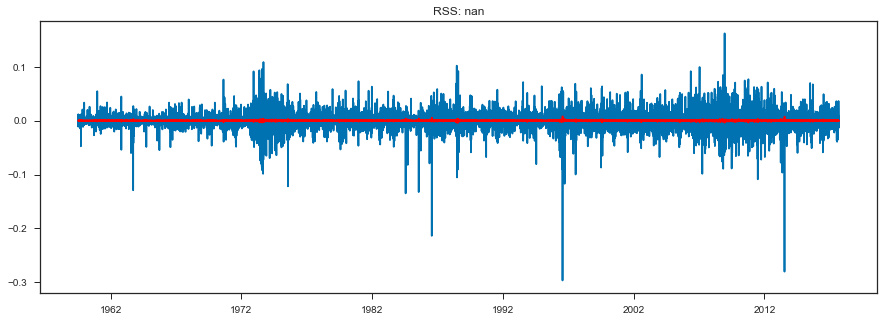

In [145]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
#Feature selection to predict the Corn future price 

In [148]:
futures_input = pd.read_csv('D:\\AgReliant\\CropData\\InputData\\CHRIS-CME_C1.csv') 
futures_input.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,7/1/1959,120.2,120.3,119.6,119.7,NaN,119.7,3952,13997
1,7/2/1959,119.6,120.0,119.2,119.6,NaN,119.6,2223,14047
2,7/6/1959,119.4,119.5,117.7,118.0,NaN,118.0,3121,14206
3,7/7/1959,118.1,118.5,118.0,118.3,NaN,118.3,3540,14142
4,7/8/1959,118.4,118.5,117.3,117.3,NaN,117.3,2922,14353


In [149]:
usable_years = [i for i in range(1960, 2018)]
futures_df = pd.DataFrame()
dates = [i.split(' ')[0] for i in list(futures_input['Date'])]
futures_df['year'] = [int(i.split('/')[2]) for i in dates]
futures_df['month'] = [int(i.split('/')[0]) for i in dates]
futures_df['day'] = [int(i.split('/')[1]) for i in dates]
futures_df['price'] = futures_input['Open'] # Opening prices
futures_df = futures_df[futures_df["year"].isin(usable_years)]

In [150]:
futures_df.head()

,year,month,day,price
128,1960,1,4,114.0
129,1960,1,5,114.1
130,1960,1,6,113.7
131,1960,1,7,114.4
132,1960,1,8,114.6


In [152]:
inflation_input = pd.read_csv('D:\\AgReliant\\CropData\\InputData\\Inflation.csv') 
usable_years_str = [str(i) for i in usable_years]

inflation_input.head()

#Consumer price index reflects changes in the cost to the average consumer of acquiring a basket of goods and
#services that may be fixed or changed at specified intervals, such as yearly. 

,year,SeriesName
0,2017,110.067009
1,2016,110.067009
2,2015,108.695722
3,2014,108.566932
4,2013,106.833849


In [153]:
consumer_price_index = dict(zip(inflation_input.year, inflation_input.SeriesName))

In [154]:
consumer_price_index[2017]

110.06700890000002

In [158]:
prices = np.zeros((len(usable_years), 12))
for i, year in enumerate(usable_years):
      for j, month in enumerate(range(1, 13)):
            entries = futures_df.loc[(futures_df['year'] == year) & (futures_df['month'] == month)]
            average_price = np.mean(list(entries['price'])) / (consumer_price_index[year] * 100)
            prices[i, j] = average_price

D:\Installation\Anaconda3-4-1-1\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning:

Mean of empty slice.

D:\Installation\Anaconda3-4-1-1\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [161]:
Monthly_Average_Ratio = pd.DataFrame(data = prices)
Monthly_Average_Ratio.columns = ['price_per_bushel_january', 'price_per_bushel_february', 'price_per_bushel_march',
                               'price_per_bushel_april', 'price_per_bushel_may', 'price_per_bushel_june', 'price_per_bushel_july',
                               'price_per_bushel_august', 'price_per_bushel_september', 'price_per_bushel_october',
                               'price_per_bushel_november', 'price_per_bushel_december']
Monthly_Average_Ratio['year'] = usable_years
Monthly_Average_Ratio.to_csv('D:\\AgReliant\\CropData\\Features\\Monthly_Average_Ratio.csv')

In [162]:
Monthly_Average_Ratio

,price_per_bushel_january,price_per_bushel_february,price_per_bushel_march,price_per_bushel_april,price_per_bushel_may,price_per_bushel_june,price_per_bushel_july,price_per_bushel_august,price_per_bushel_september,price_per_bushel_october,price_per_bushel_november,price_per_bushel_december,year
0,0.084279,0.083417,0.084546,0.087418,0.087515,0.087043,0.086235,0.085059,0.082480,0.079824,0.077058,0.077929,1960
1,0.081533,0.083869,0.083062,0.080102,0.082549,0.083125,0.083281,0.081527,0.079311,0.080024,0.079839,0.078954,1961
2,0.077607,0.076258,0.078718,0.081085,0.081631,0.080448,0.078844,0.076784,0.077427,0.076891,0.076799,0.079688,1962
3,0.081749,0.082522,0.083370,0.083390,0.085579,0.089550,0.090646,0.087545,0.088717,0.084178,0.083553,0.084465,1963
4,0.084685,0.083288,0.084385,0.086340,0.087321,0.086593,0.084314,0.084633,0.087127,0.085139,0.084909,0.086890,1964
5,0.087361,0.088330,0.090019,0.091891,0.092136,0.091311,0.088585,0.084238,0.083820,0.079319,0.079747,0.084854,1965
6,0.086342,0.085698,0.082918,0.085016,0.084986,0.086776,0.093137,0.097874,0.094668,0.090908,0.093187,0.095672,1966
7,0.092304,0.090078,0.091241,0.089240,0.086457,0.086772,0.083193,0.078759,0.076644,0.074294,0.073828,0.076098,1967
8,0.074518,0.074318,0.074962,0.073050,0.072088,0.071342,0.069087,0.066024,0.065317,0.066217,0.072345,0.072212,1968
9,0.070023,0.068798,0.068261,0.071365,0.075949,0.076051,0.075042,0.072975,0.071361,0.070511,0.070614,0.070614,1969
